## Load data

In [1]:
import pandas as pd
import ast
import numpy as np

# Load in data
admissions = 'tedsa_puf_2019.csv'
df = pd.read_csv(f'../../Downloads/{admissions}')

## Compare SUB1 groups with DSMCRIT

In [2]:
sub1 = df['SUB1']
for i in [1,2,3,4,8,9,10,11,12,13,14,15,16,17,18,19]:
    sub1 = sub1.replace(i, 'Other')
# sub1 = sub1.replace(-9, np.nan)

dsmcrit = df['DSMCRIT']
for i in [1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18,19]:
    dsmcrit = dsmcrit.replace(i, 'Other')
# dsmcrit = dsmcrit.replace(-9, np.nan)

In [3]:
df4 = pd.DataFrame()
df4['SUB1'] = sub1
df4['DSMCRIT'] = dsmcrit

df4.value_counts()

print('See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown')

See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown


## Filter out select rows and columns

In [4]:
df.columns

Index(['ADMYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT',
       'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG',
       'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [5]:
# Get count of original number of rows
old_rows = len(df)

# Drop Puerto Rico
# df = df[df['STFIPS'] != 72]

# Drop defined columns
columns_to_drop = ['ADMYR', 'CASEID', 'CBSA2010']  # consider also dropping 'STFIPS'
df = df.drop(columns=columns_to_drop)
print(f'Dropped {len(columns_to_drop)} columns ({len(df.columns)} remain)')

# Drop values where dependent variable is unknown
df = df[df['METHUSE'] != -9]

# Only keep patients admitted with self-described use of an opioid as their primary substance use (i.e., SUB1 = 5, 6, or 7)
df = df[df['SUB1'].between(5, 7)]
new_rows = len(df)
percent_change = round(100*(old_rows-new_rows)/old_rows, 1)
print(f'Dropped {"{:,}".format(old_rows-new_rows)} observations or {percent_change}% of the data ({"{:,}".format(new_rows)} rows remain)')

df = df.reset_index(drop='index')

Dropped 3 columns (59 remain)
Dropped 1,340,233 observations or 71.9% of the data (524,134 rows remain)


In [6]:
df

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,EMPLOY,METHUSE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2,2,1,7,-9,3,1,0,3,2,...,0,0,0,0,0,0,9,4,1,3
1,2,3,1,7,-9,2,3,0,4,1,...,0,0,0,0,0,0,9,4,1,2
2,2,1,2,7,-9,5,2,0,4,1,...,0,0,0,0,0,0,9,4,1,2
3,2,3,1,7,-9,3,3,0,4,1,...,0,0,0,0,0,0,9,4,1,2
4,2,3,1,7,-9,1,2,0,2,1,...,0,0,0,0,0,0,9,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524129,56,-9,2,6,-9,0,6,0,3,2,...,0,0,0,0,0,0,8,4,0,2
524130,56,-9,2,6,1,2,7,0,3,2,...,0,0,0,0,0,0,8,4,0,2
524131,56,3,1,7,-9,3,2,0,3,2,...,0,0,1,0,0,0,8,4,0,3
524132,56,1,1,7,3,0,7,0,4,2,...,0,0,0,0,0,0,8,4,0,2


## Make dataset human-readable

In [7]:
# Load in variable dictionary
with open('VariableDictionary.txt') as file:
    variable_dict_string = file.read()
    variable_dict = ast.literal_eval(variable_dict_string)

# Rename entries in column according to dictionary
df2 = df.copy()
for col, col_dict in variable_dict.items():
    for old_value, new_value in variable_dict[col].items():
        df2[col] = df2[col].replace(old_value, new_value)

# Rename "-9" values as "Unknown"
for col in df2.columns:
    df2[col] = df2[col].replace(-9, 'Unknown')

In [8]:
# Merge DETNLF (detailed not in labor force) into EMPLOY==4 (not in labor force)
detailed_employ = []

for idx, value in df2.iterrows():
    if value['EMPLOY'] == 'NotInLaborForce':
        if value['DETNLF'] == 'Unknown':
            # Assign 'UnknownNotInLaborForce' if 'NotInLaborForce' and 'Unknown'
            detailed_employ.append('UnknownNotInLaborForce')
        else:
            # Otherwise, assign as the DETNLF value
            detailed_employ.append(value['DETNLF'])
    else:
        # Assign the EMPLOY value if not 'NotInLaborForce'
        detailed_employ.append(value['EMPLOY'])

# Add a new column for detailed employment and drop the two source columns
df2['DETEMPLOY'] = detailed_employ
df2 = df2.drop(columns=['EMPLOY', 'DETNLF'])

In [9]:
df2

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,AK,Grade9To11,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,3PriorTreatments,Individual,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,Alcohol&Drugs,Unemployed
1,AK,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,2PriorTreatments,OtherHealthCareProvider,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,OtherNotInLaborForce
2,AK,Grade8OrLess,NowMarried,AmbulatoryNonIntensiveOutpatient,Unknown,5PlusPriorTreatments,DrugCareProvider,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,RetiredOrDisabled
3,AK,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,3PriorTreatments,OtherHealthCareProvider,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,OtherNotInLaborForce
4,AK,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,1PriorTreatments,DrugCareProvider,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,PartTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524129,WY,Unknown,NowMarried,AmbulatoryIntensiveOutpatient,Unknown,0PriorTreatments,OtherReferral,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Mountain,West,NoIDU,OtherDrugs,Unemployed
524130,WY,Unknown,NowMarried,AmbulatoryIntensiveOutpatient,Court,2PriorTreatments,CourtReferral,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Mountain,West,NoIDU,OtherDrugs,Unemployed
524131,WY,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,3PriorTreatments,DrugCareProvider,0Arrest,NoMethUse,Yes,...,NotReported,Reported,NotReported,NotReported,NotReported,Mountain,West,NoIDU,Alcohol&Drugs,Unemployed
524132,WY,Grade8OrLess,NeverMarried,AmbulatoryNonIntensiveOutpatient,ProbationOrParole,0PriorTreatments,CourtReferral,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Mountain,West,NoIDU,OtherDrugs,InstitutionResident


## Make machine-readable dataset (for exporting)
todo instead of using get_dummies, identify which variables are ordinal and which nominal

In [10]:
# Remove dependent variable
df2['METHUSE'] = df2['METHUSE'].replace('MethUse', 1)
df2['METHUSE'] = df2['METHUSE'].replace('NoMethUse', 0)

# df2.to_csv('human_readable_data.csv', index=False)

In [11]:
df3 = df2.copy()

# Convert categorical variables to dummy variables
df3 = pd.get_dummies(df3)

# Add intercept
df3.insert(0, 'Intercept', 1)

# Save dataframe to csv and show below
# df3.to_csv('data.csv', index=False)
df3

,Intercept,METHUSE,STFIPS_72,STFIPS_AK,STFIPS_AL,STFIPS_AR,STFIPS_AZ,STFIPS_CA,STFIPS_CO,STFIPS_CT,...,DETEMPLOY_FullTime,DETEMPLOY_Homemaker,DETEMPLOY_InstitutionResident,DETEMPLOY_OtherNotInLaborForce,DETEMPLOY_PartTime,DETEMPLOY_RetiredOrDisabled,DETEMPLOY_Student,DETEMPLOY_Unemployed,DETEMPLOY_Unknown,DETEMPLOY_UnknownNotInLaborForce
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524129,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524130,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524131,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524132,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Make machine-readable dataset (encoding)

In [50]:
# from numpy import asarray
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder

df4 = df2.copy()

In [51]:
from sklearn.preprocessing import OrdinalEncoder

df4['STFIPS'] = df4['STFIPS'].astype('category').cat.codes
df4['EDUC'] = OrdinalEncoder(categories=[['Unknown', 'Grade8OrLess', 'Grade9To11', 'Grade12OrGED', '1To3yCollege', '4yCollegePlus']]).fit_transform(df4[['EDUC']])
df4['MARSTAT'] = df4['MARSTAT'].astype('category').cat.codes
df4['SERVICES'] = df4['SERVICES'].astype('category').cat.codes
df4['DETCRIM'] = df4['DETCRIM'].astype('category').cat.codes
df4['NOPRIOR'] = OrdinalEncoder(categories=[['Unknown', '0PriorTreatments', '1PriorTreatments', '2PriorTreatments', '3PriorTreatments',
                                            '4PriorTreatments', '5PlusPriorTreatments']]).fit_transform(df4[['NOPRIOR']])
df4['PSOURCE'] = df4['PSOURCE'].astype('category').cat.codes
df4['ARRESTS'] = OrdinalEncoder(categories=[['Unknown', '0Arrest', '1Arrest', '2PlusArrest']]).fit_transform(df4[['ARRESTS']])
# df4['METHUSE'] = df4['METHUSE'].astype('category').cat.codes
df4['PSYPROB'] = df4['PSYPROB'].astype('category').cat.codes
df4['PREG'] = df4['PREG'].astype('category').cat.codes
df4['GENDER'] = df4['GENDER'].astype('category').cat.codes
df4['VET'] = df4['VET'].astype('category').cat.codes
df4['LIVARAG'] = df4['LIVARAG'].astype('category').cat.codes
df4['DAYWAIT'] = OrdinalEncoder(categories=[['Unknown', '0DaysWait', '1To7DaysWait', '8To14DaysWait', '15To30DaysWait',
                                            '31PlusDaysWait']]).fit_transform(df4[['DAYWAIT']])
df4['DSMCRIT'] = df4['DSMCRIT'].astype('category').cat.codes
df4['AGE'] = OrdinalEncoder(categories=[['Age12To14', 'Age15To17', 'Age18To20', 'Age21To24', 'Age25To29', 'Age30To34', 'Age35To39', 'Age40To44',
                                        'Age45To49', 'Age50To54', 'Age55To64', 'Age65Plus' ]]).fit_transform(df4[['AGE']])
df4['RACE'] = df4['RACE'].astype('category').cat.codes
df4['ETHNIC'] = df4['ETHNIC'].astype('category').cat.codes
df4['PRIMINC'] = df4['PRIMINC'].astype('category').cat.codes
df4['SUB1'] = df4['SUB1'].astype('category').cat.codes
df4['SUB2'] = df4['SUB2'].astype('category').cat.codes
df4['SUB3'] = df4['SUB3'].astype('category').cat.codes
df4['ROUTE1'] = df4['ROUTE1'].astype('category').cat.codes
df4['ROUTE2'] = df4['ROUTE2'].astype('category').cat.codes
df4['ROUTE3'] = df4['ROUTE3'].astype('category').cat.codes
df4['FREQ1'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ1']])
df4['FREQ2'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ2']])
df4['FREQ3'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ3']])
df4['FRSTUSE1'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE1']])
df4['FRSTUSE2'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE2']])
df4['FRSTUSE3'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE3']])
df4['HLTHINS'] = df4['HLTHINS'].astype('category').cat.codes
df4['PRIMPAY'] = df4['PRIMPAY'].astype('category').cat.codes
df4['FREQ_ATND_SELF_HELP'] = OrdinalEncoder(categories=[['Unknown', 'NoAttendance', 'SomeAttendance', '1To3TimesPastMonth', '4To7TimesPastMonth',
                                                        '8To30TimesPastMonth']]).fit_transform(df4[['FREQ_ATND_SELF_HELP']])
df4['ALCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['ALCFLG']])
df4['COKEFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['COKEFLG']])
df4['MARFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MARFLG']])
df4['HERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HERFLG']])
df4['METHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['METHFLG']])
df4['OPSYNFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OPSYNFLG']])
df4['PCPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['PCPFLG']])
df4['HALLFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HALLFLG']])
df4['MTHAMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MTHAMFLG']])
df4['AMPHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['AMPHFLG']])
df4['STIMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['STIMFLG']])
df4['BENZFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BENZFLG']])
df4['TRNQFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['TRNQFLG']])
df4['BARBFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BARBFLG']])
df4['SEDHPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['SEDHPFLG']])
df4['INHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['INHFLG']])
df4['OTCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTCFLG']])
df4['OTHERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTHERFLG']])
df4['DIVISION'] = df4['DIVISION'].astype('category').cat.codes
df4['REGION'] = df4['REGION'].astype('category').cat.codes
df4['IDU'] = OrdinalEncoder(categories=[['NoIDU', 'IDU']]).fit_transform(df4[['IDU']])
df4['ALCDRUG'] = OrdinalEncoder(categories=[['OtherDrugs', 'Alcohol&Drugs']]).fit_transform(df4[['ALCDRUG']])
df4['DETEMPLOY'] = df4['DETEMPLOY'].astype('category').cat.codes

In [52]:
# # example data frame
# df = pd.DataFrame({
#     'col0': [5, 3.2, 6.8],
#     'col1': ['A', 'B', 'C'],
#     'col2': ['D', 'E', 'F'],
#     'col3': ['red', 'blue', 'green'],
#     'col4': ['small', 'medium', 'large'],
#     'col5': [1.2, 3.4, 5.6],
#     'col6': [7.8, 9.0, 2.1]
# })
#
# # df['col0']
# df['col1'] = OrdinalEncoder(categories=[[None, 'C', 'A', 'B']]).fit_transform(df[['col1']])
# df['col2'] = OrdinalEncoder(categories=[[None, 'D', 'E', 'F']]).fit_transform(df[['col2']])
# df['col3'] = df['col3'].astype('category')
# df['col4'] = df['col4'].astype('category')
# # df['col5']
# # df['col6']

In [53]:
df4.dtypes

STFIPS                    int8
EDUC                   float64
MARSTAT                   int8
SERVICES                  int8
DETCRIM                   int8
NOPRIOR                float64
PSOURCE                   int8
ARRESTS                float64
METHUSE                  int64
PSYPROB                   int8
PREG                      int8
GENDER                    int8
VET                       int8
LIVARAG                   int8
DAYWAIT                float64
DSMCRIT                   int8
AGE                    float64
RACE                      int8
ETHNIC                    int8
PRIMINC                   int8
SUB1                      int8
SUB2                      int8
SUB3                      int8
ROUTE1                    int8
ROUTE2                    int8
ROUTE3                    int8
FREQ1                  float64
FREQ2                  float64
FREQ3                  float64
FRSTUSE1               float64
FRSTUSE2               float64
FRSTUSE3               float64
HLTHINS 

In [54]:
df4

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,1,2.0,1,2,8,4.0,3,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,6,4,1.0,1.0,7
1,1,3.0,1,2,8,3.0,4,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,6,4,1.0,0.0,3
2,1,1.0,2,2,8,6.0,1,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,6,4,1.0,0.0,5
3,1,3.0,1,2,8,4.0,4,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,6,4,1.0,0.0,3
4,1,3.0,1,2,8,2.0,1,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,6,4,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524129,47,0.0,2,1,8,1.0,5,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,4,4,0.0,0.0,7
524130,47,0.0,2,1,1,3.0,0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,4,4,0.0,0.0,7
524131,47,3.0,1,2,8,4.0,1,1.0,0,2,...,0.0,1.0,0.0,0.0,0.0,4,4,0.0,1.0,7
524132,47,1.0,1,2,7,1.0,0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,4,4,0.0,0.0,2


### Train test split

## Train XG Boost model

In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = df4.drop('METHUSE', axis=1)
y = df4['METHUSE'].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [56]:
# y['METHUSE'].str.contains('>')
y_train.dtypes

dtype('float64')

In [57]:
import xgboost as xgb
import shap
import numpy as np

# Train XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=24)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=24,
              reg_alpha=0, reg_lambda=1, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


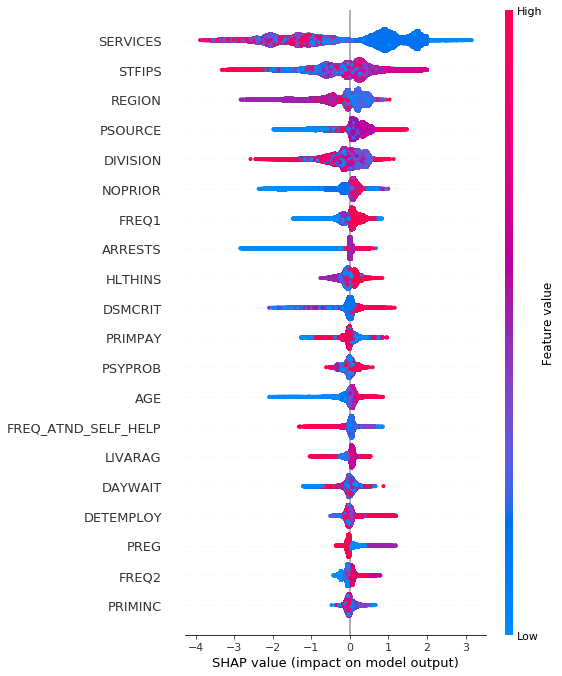

In [58]:
# Generate Shapley values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot Shapley summary plot
shap.summary_plot(shap_values, X)

In [18]:
stop

NameError: name 'stop' is not defined

## Run linear regression to test out the data

In [ ]:
from sklearn.model_selection import train_test_split

# Define independent variables X and dependent variable y
y = df3['METHUSE']
X = df3.drop(columns='METHUSE')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [ ]:
# Load modules and data
import statsmodels
import statsmodels.api as sm

# Fit and summarize OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

y_hat = results.predict(X_test)
mse = statsmodels.tools.eval_measures.mse(y_test, y_hat)

print('MSE:', mse)
print(results.summary())